In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./product review.csv')
df.head()

,Id,ProductId,UserId,Score,Date,Y-M,Year,Month,Season
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5.0,2011-04-27,2011-04,2011.0,4.0,Summer
1,2,B00813GRG4,A1D87F6ZCVE5NK,1.0,2012-09-07,2012-09,2012.0,9.0,Autumn
2,3,B000LQOCH0,ABXLMWJIXXAIN,4.0,2008-08-18,2008-08,2008.0,8.0,Autumn
3,4,B000UA0QIQ,A395BORC6FGVXV,2.0,2011-06-13,2011-06,2011.0,6.0,Summer
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5.0,2012-10-21,2012-10,2012.0,10.0,Winter


## 資料前處理

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Id         568454 non-null  int64  
 1   ProductId  568330 non-null  object 
 2   UserId     568336 non-null  object 
 3   Score      568325 non-null  float64
 4   Date       568325 non-null  object 
 5   Y-M        568325 non-null  object 
 6   Year       568325 non-null  float64
 7   Month      568325 non-null  float64
 8   Season     568454 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 39.0+ MB


### 資料清理 (Data Cleaning)

- isnull():檢查空值，回傳布林值
- notnull():檢查不是空值，回傳布林值
- dropna():刪除空值
- fillna():填入空值

In [4]:
# 刪除缺失值(行)
df.dropna(inplace=True)

### 類別資料的處理

In [5]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Season_Label'] = label.fit_transform(df['Season'])
df[['Season', 'Season_Label']] 

,Season,Season_Label
0,Summer,2
1,Autumn,0
2,Autumn,0
3,Summer,2
4,Winter,3
...,...,...
568449,Spring,1
568450,Spring,1
568451,Spring,1
568452,Spring,1


In [6]:
# One-hot Encoding

onehot = pd.get_dummies(df['Season'])
pd.concat([df['Season'],onehot], axis=1)

,Season,Autumn,Spring,Summer,Winter
0,Summer,False,False,True,False
1,Autumn,True,False,False,False
2,Autumn,True,False,False,False
3,Summer,False,False,True,False
4,Winter,False,False,False,True
...,...,...,...,...,...
568449,Spring,False,True,False,False
568450,Spring,False,True,False,False
568451,Spring,False,True,False,False
568452,Spring,False,True,False,False


### 類別資料的處理

In [7]:
# Max-Min
from IPython.display import Math

Math(r'x^{(i)}_{norm}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}')

<IPython.core.display.Math object>

In [8]:
from sklearn import preprocessing

#建立MinMaxScaler物件
minmax = preprocessing.MinMaxScaler()

# 資料標準化
df['Max_Min'] = minmax.fit_transform(df['Score'].values.reshape(-1,1))
df[['Score', 'Max_Min']]

,Score,Max_Min
0,5.0,1.00
1,1.0,0.00
2,4.0,0.75
3,2.0,0.25
4,5.0,1.00
...,...,...
568449,5.0,1.00
568450,2.0,0.25
568451,5.0,1.00
568452,5.0,1.00


In [9]:
# Z-Score
from IPython.display import Math

Math(r'x^{(i)}_{std}=\frac{x^{(i)}-\mu_{x}}{\sigma_{x}}')

<IPython.core.display.Math object>

In [10]:
from sklearn import preprocessing

#建立StandardScaler物件
zscore = preprocessing.StandardScaler()

# 資料標準化
df['Z_Score'] = zscore.fit_transform(df['Score'].values.reshape(-1,1))
df[['Score', 'Z_Score']]

,Score,Z_Score
0,5.0,0.623271
1,1.0,-2.429197
2,4.0,-0.139846
3,2.0,-1.666080
4,5.0,0.623271
...,...,...
568449,5.0,0.623271
568450,2.0,-1.666080
568451,5.0,0.623271
568452,5.0,0.623271


## 視覺化

In [11]:
# 導入套件
import matplotlib.pyplot as plt
import seaborn

In [12]:
# 添加中文字型
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

### 長條圖 Bar chart

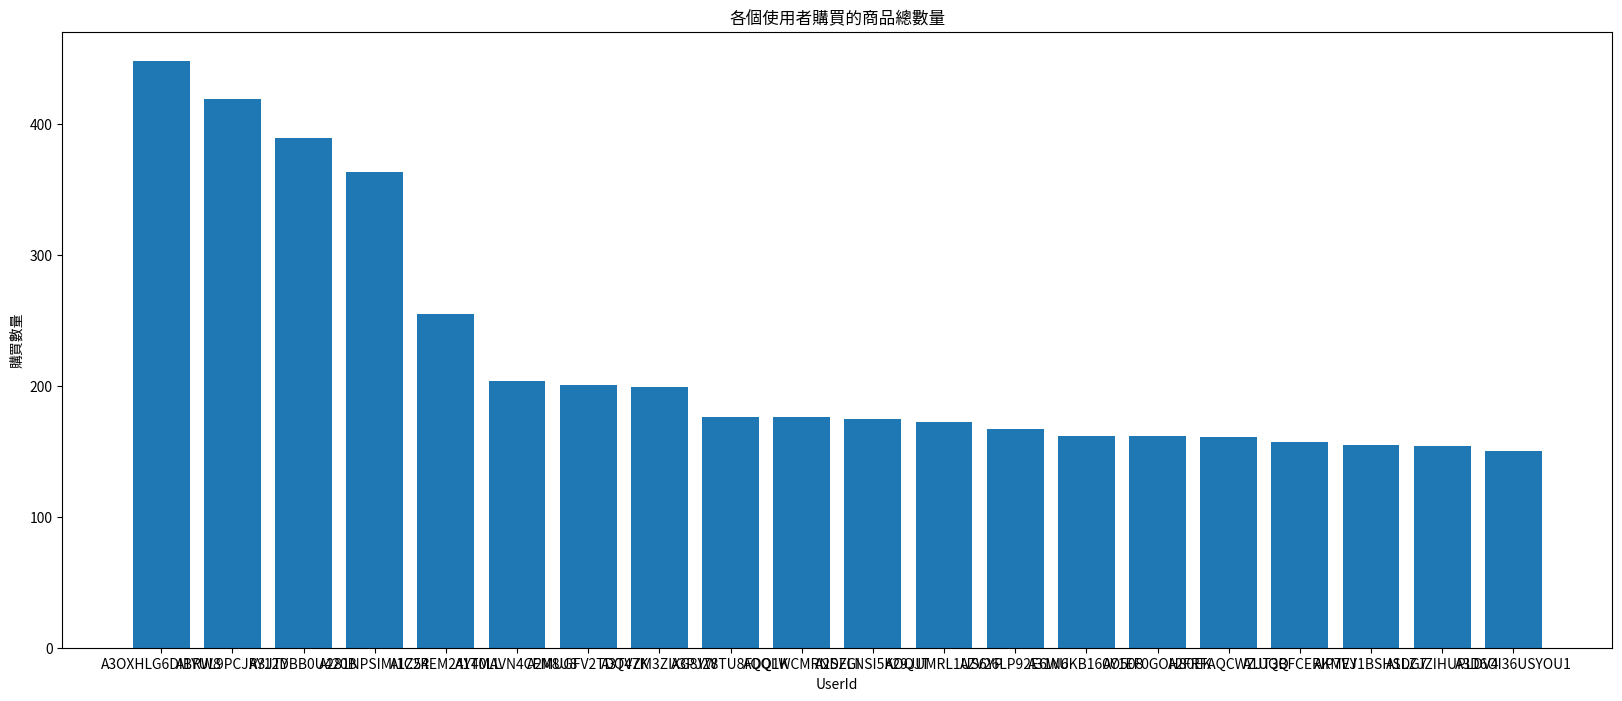

In [13]:
user_buy_count = df.groupby('UserId').count()['Id'].sort_values(ascending=False)

# 創建圖形並設置大小
plt.figure(figsize=(20,8))

# 創建長條圖
plt.bar(user_buy_count[:20].index, user_buy_count[:20].values)

# 添加圖標題
plt.title('各個使用者購買的商品總數量')

# 添加軸標籤
plt.xlabel('UserId')
plt.ylabel('購買數量')

# 顯示圖形
plt.show()

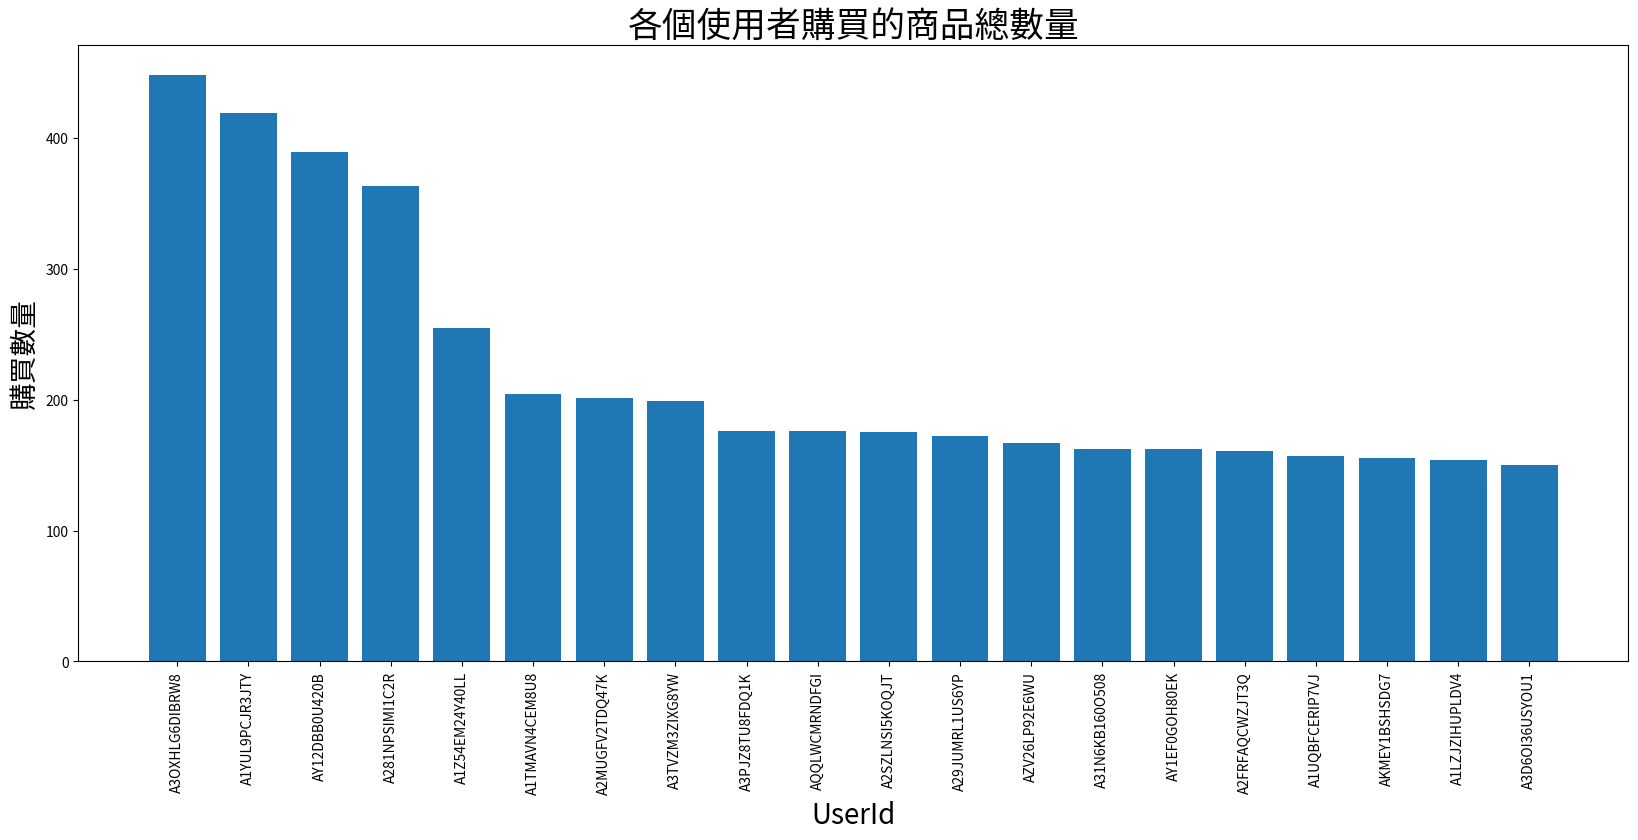

In [14]:
# 創建圖形並設置大小
plt.figure(figsize=(20,8))

# 創建長條圖
plt.bar(user_buy_count[:20].index, user_buy_count[:20].values)

# 添加圖標題
plt.title('各個使用者購買的商品總數量', fontsize = 25)

# 添加軸標籤
plt.xlabel('UserId', fontsize = 20)
plt.ylabel('購買數量', fontsize = 20)

# 設定軸刻度標籤
plt.xticks(rotation = 90)

# 顯示圖形
plt.show()

In [15]:
season_score = pd.DataFrame()
season_score['Score'] = df[df['Season']=='Spring'].groupby('Score').Id.count().index
season_score['Spring'] = df[df['Season']=='Spring'].groupby('Score').Id.count().values
season_score['Summer'] = df[df['Season']=='Summer'].groupby('Score').Id.count().values
season_score['Autumn'] = df[df['Season']=='Autumn'].groupby('Score').Id.count().values
season_score['Winter'] = df[df['Season']=='Winter'].groupby('Score').Id.count().values
season_score

,Score,Spring,Summer,Autumn,Winter
0,1.0,13291,11983,14058,12888
1,2.0,7770,6919,8047,7005
2,3.0,10741,10147,11668,10039
3,4.0,20024,20147,21973,18436
4,5.0,92134,85880,98803,86001


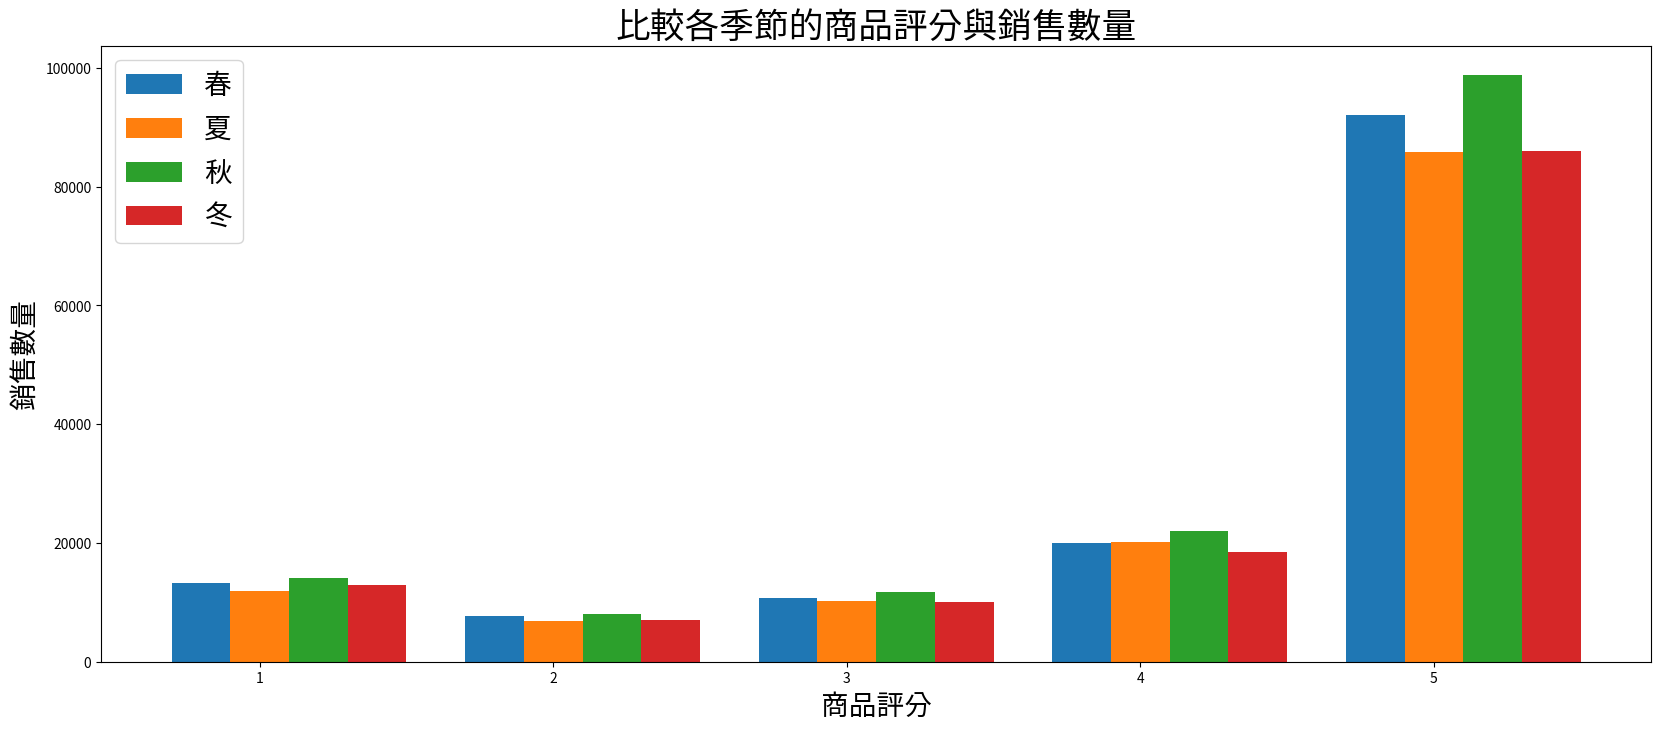

In [16]:
# 創建圖形並設置大小
plt.figure(figsize=(20,8))

# 設定長條寬度
width_val = 0.2

# 創建長條圖
plt.bar(x=season_score.Score-width_val, height=season_score['Spring'], width=width_val, label = '春')
plt.bar(x=season_score.Score, height=season_score['Summer'], width=width_val, label = '夏')
plt.bar(x=season_score.Score+width_val, height=season_score['Autumn'], width=width_val, label = '秋')
plt.bar(x=season_score.Score+width_val*2, height=season_score['Winter'], width=width_val, label = '冬')

# 添加圖標題
plt.title('比較各季節的商品評分與銷售數量', fontsize = 25)

# 添加軸標籤
plt.xlabel('商品評分', fontsize = 20)
plt.ylabel('銷售數量', fontsize = 20)

# 添加圖例說明
plt.legend(fontsize = 20)

# 顯示圖形
plt.show()

### 折線圖 Line chart

In [17]:
month_sales = df.groupby('Y-M').Id.count().sort_index()
month_sales

Y-M
1999-10        2
1999-12        4
2000-01        8
2000-02        3
2000-06        5
           ...  
2012-06    18102
2012-07    19829
2012-08    19815
2012-09    21891
2012-10    20323
Name: Id, Length: 143, dtype: int64

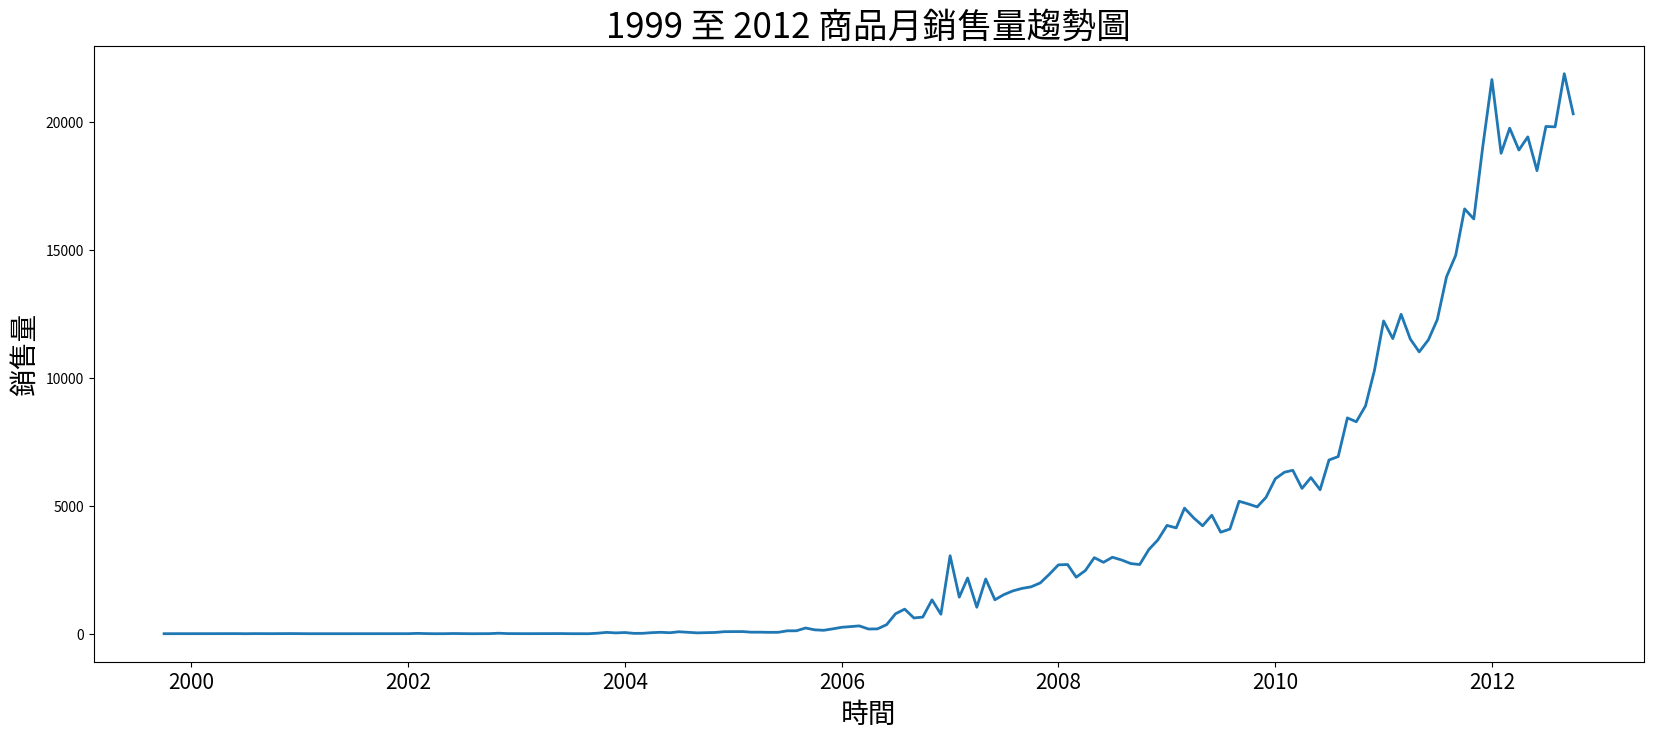

In [18]:
# 創建圖形並設置大小
plt.figure(figsize=(20,8))

# 創建長條圖
plt.plot(pd.to_datetime(month_sales.index), month_sales.values, linewidth=2)

# 添加圖標題
plt.title('1999 至 2012 商品月銷售量趨勢圖', fontsize=25)

# 添加軸標籤
plt.xlabel('時間', fontsize=20)
plt.ylabel('銷售量', fontsize=20)

# 設定軸刻度標籤
plt.xticks(fontsize=15)

# 顯示圖形
plt.show()

In [19]:
sales_2009 = df[df['Year']==2009].groupby('Month').Id.count()
sales_2010 = df[df['Year']==2010].groupby('Month').Id.count()
sales_2011 = df[df['Year']==2011].groupby('Month').Id.count()

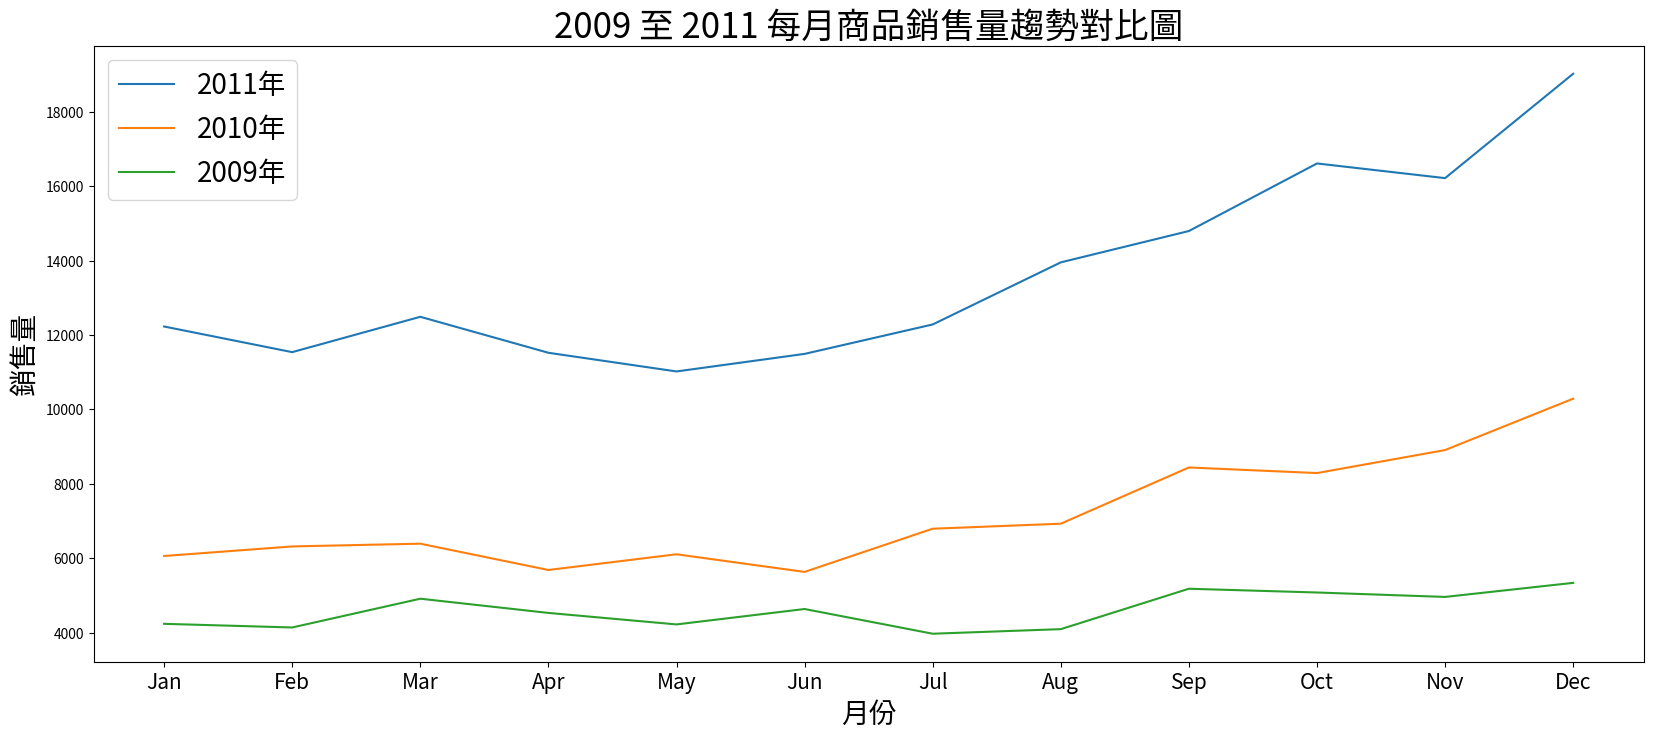

In [20]:
# 創建圖形並設置大小
plt.figure(figsize=(20,8))

# 創建長條圖
plt.plot(sales_2011.index, sales_2011, label = '2011年')
plt.plot(sales_2010.index, sales_2010, label = '2010年')
plt.plot(sales_2009.index, sales_2009, label = '2009年')

# 添加圖標題
plt.title('2009 至 2011 每月商品銷售量趨勢對比圖', fontsize=25)

# 添加軸標籤
plt.xlabel('月份', fontsize=20)
plt.ylabel('銷售量', fontsize=20)

# 設定軸刻度標籤
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct', 'Nov', 'Dec'], fontsize = 15)

# 添加圖例說明
plt.legend(fontsize = 20)

# 顯示圖形
plt.show()

### 圓餅圖 Pie Chart

In [21]:
top5_sales = df.groupby('ProductId').Id.count().sort_values(ascending=False)[:5]
top5_sales

ProductId
B007JFMH8M    912
B002QWP89S    632
B002QWP8H0    631
B002QWHJOU    631
B0026RQTGE    631
Name: Id, dtype: int64

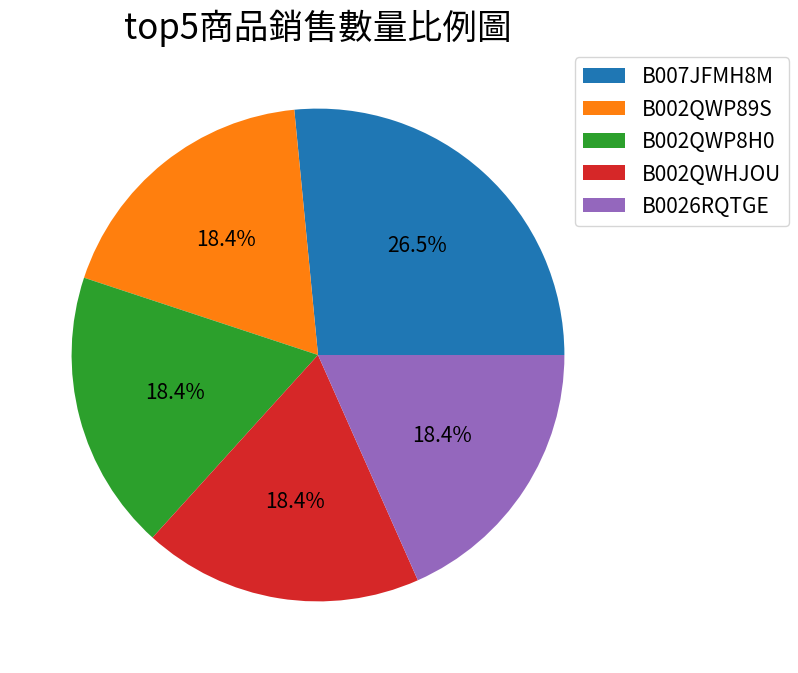

In [22]:
# 創建圖形並設置大小
plt.figure(figsize=(8,8))

# 創建圓餅圖
plt.pie(x=top5_sales, autopct='%1.1f%%', textprops = {"fontsize" : 15})

# 添加圖例說明
plt.legend(labels=top5_sales.index, fontsize = 15, bbox_to_anchor = (0.9,1))

# 添加圖標題
plt.title('top5商品銷售數量比例圖', fontsize = 25)

# 顯示圖形
plt.show()

### 散點圖 Scatter Plot

In [23]:
average_score = df.groupby('ProductId').Score.mean().sort_index()
sales_count = df.groupby('ProductId').Id.count().sort_index()

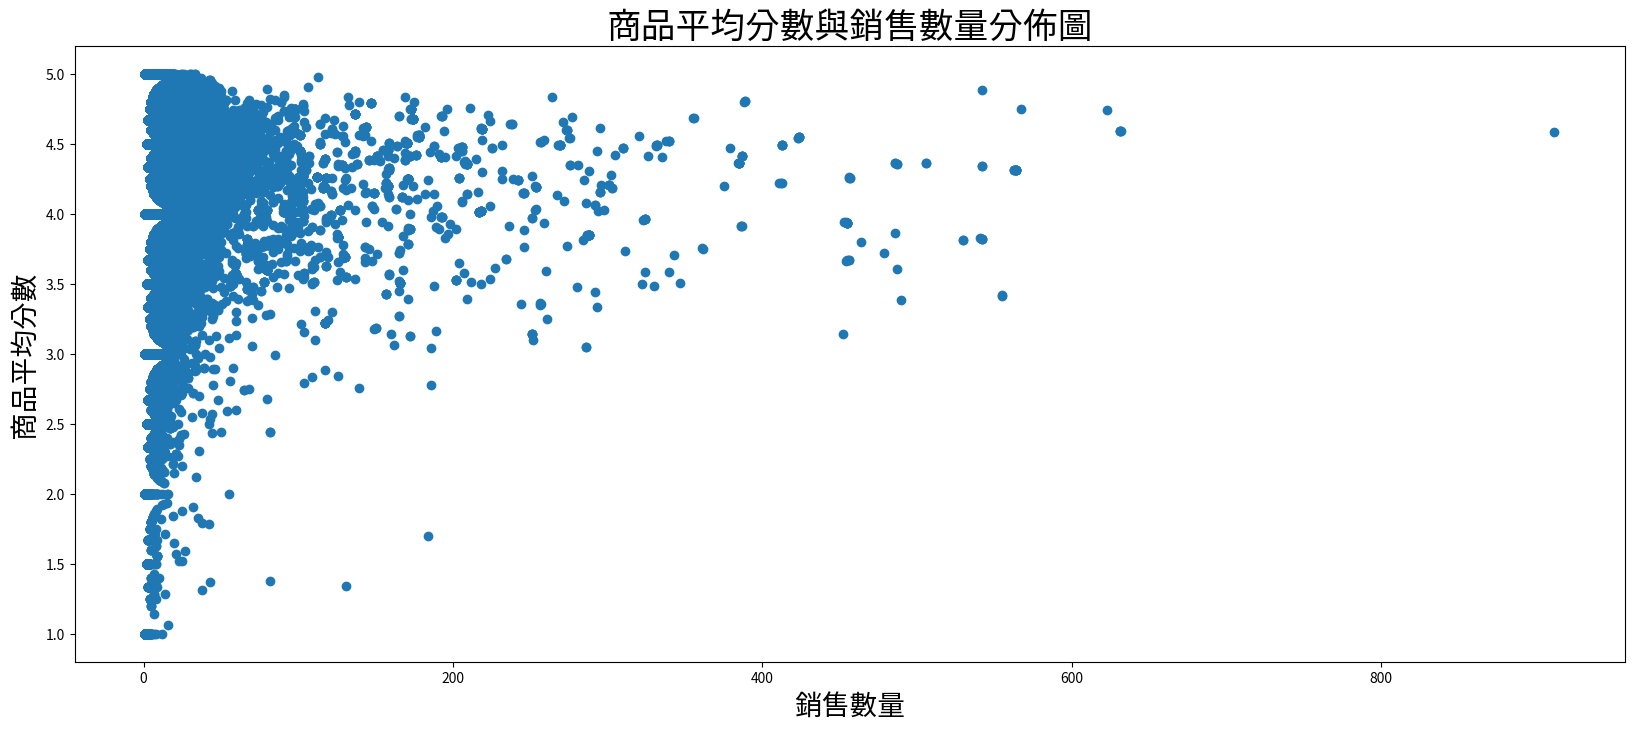

In [24]:
# 創建圖形並設置大小
plt.figure(figsize=(20,8))

# 創建散點圖
plt.scatter(sales_count, average_score)

# 添加圖標題
plt.title('商品平均分數與銷售數量分佈圖', fontsize = 25)

# 添加軸標籤
plt.xlabel('銷售數量', fontsize = 20)
plt.ylabel('商品平均分數', fontsize = 20)

# 顯示圖形
plt.show()

### 範例圖

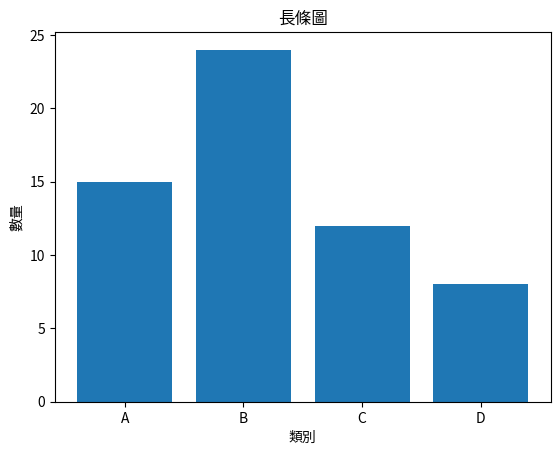

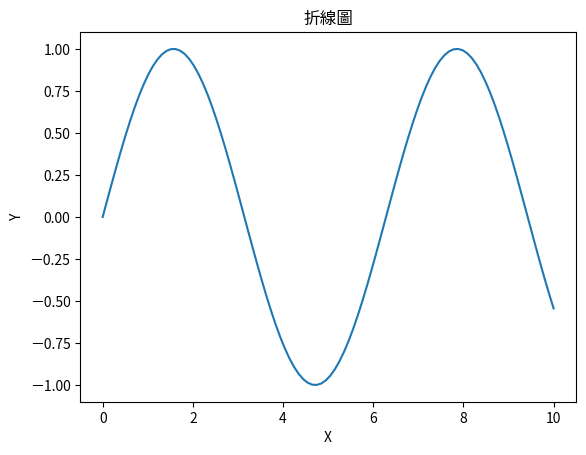

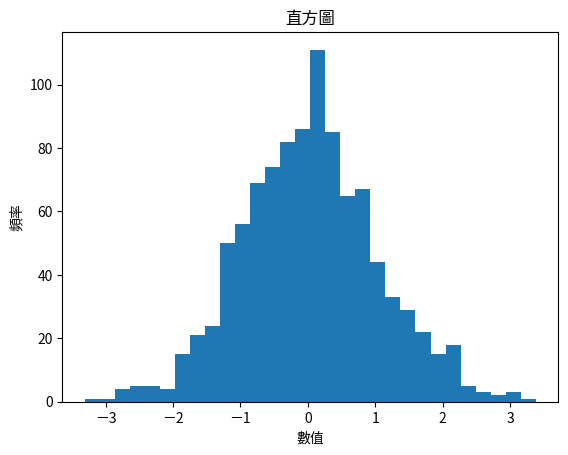

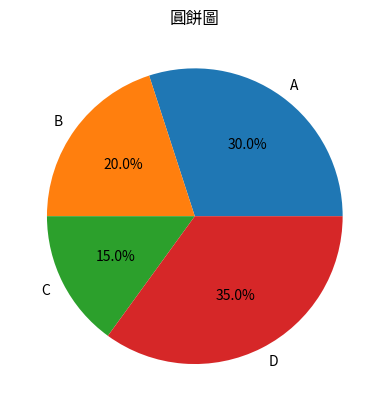

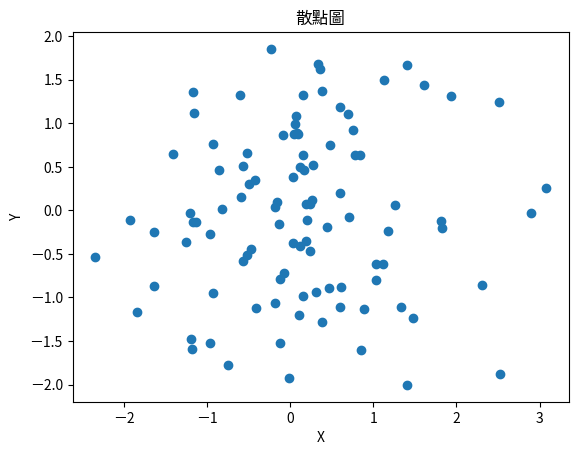

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 長條圖
categories = ['A', 'B', 'C', 'D']
values = [15, 24, 12, 8]
plt.bar(categories, values)
plt.title('長條圖')
plt.xlabel('類別')
plt.ylabel('數量')
plt.show()

# 折線圖
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title('折線圖')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 直方圖
data = np.random.randn(1000)
plt.hist(data, bins=30)
plt.title('直方圖')
plt.xlabel('數值')
plt.ylabel('頻率')
plt.show()

# 圓餅圖
labels = ['A', 'B', 'C', 'D']
sizes = [30, 20, 15, 35]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('圓餅圖')
plt.show()

# 散點圖
x = np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x, y)
plt.title('散點圖')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


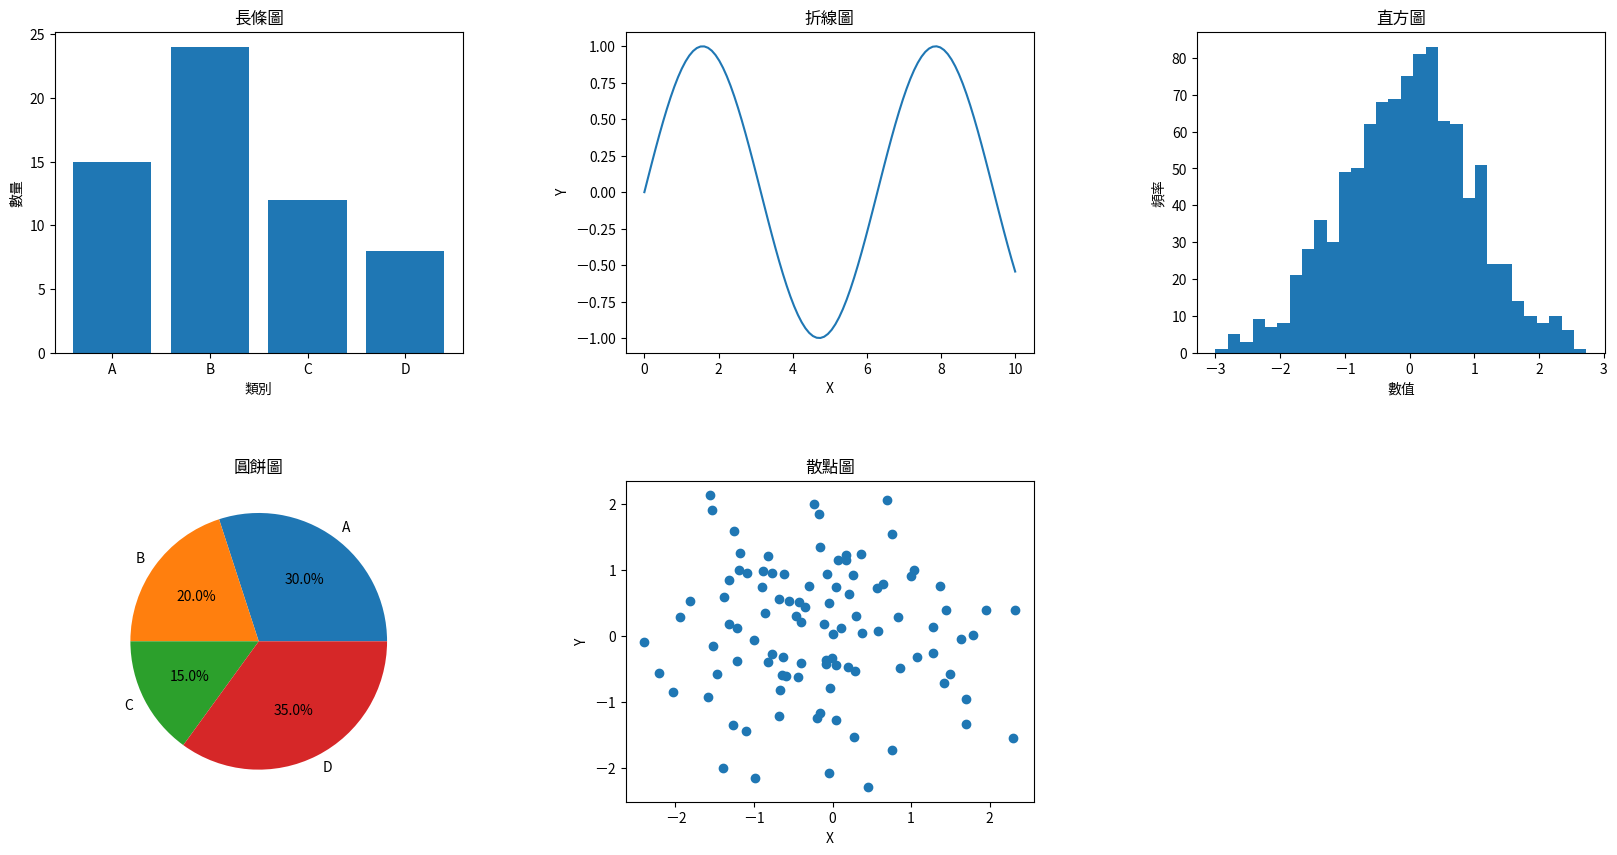

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 創建子圖
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# 長條圖
categories = ['A', 'B', 'C', 'D']
values = [15, 24, 12, 8]
axes[0, 0].bar(categories, values)
axes[0, 0].set_title('長條圖')
axes[0, 0].set_xlabel('類別')
axes[0, 0].set_ylabel('數量')

# 折線圖
x = np.linspace(0, 10, 100)
y = np.sin(x)
axes[0, 1].plot(x, y)
axes[0, 1].set_title('折線圖')
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('Y')

# 直方圖
data = np.random.randn(1000)
axes[0, 2].hist(data, bins=30)
axes[0, 2].set_title('直方圖')
axes[0, 2].set_xlabel('數值')
axes[0, 2].set_ylabel('頻率')

# 圓餅圖
labels = ['A', 'B', 'C', 'D']
sizes = [30, 20, 15, 35]
axes[1, 0].pie(sizes, labels=labels, autopct='%1.1f%%')
axes[1, 0].set_title('圓餅圖')

# 散點圖
x = np.random.randn(100)
y = np.random.randn(100)
axes[1, 1].scatter(x, y)
axes[1, 1].set_title('散點圖')
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('Y')

# 隱藏多餘的子圖
axes[1, 2].axis('off')

# 調整子圖間的間距
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# 顯示圖形
plt.show()
